<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
# Inspect the JobSat column
print("JobSat column dtype:", df['JobSat'].dtype)
print("Unique JobSat values:", df['JobSat'].unique())

# Convert JobSat to numeric if possible
def convert_job_sat(value):
    # Map job satisfaction to numeric values
    satisfaction_map = {
        'Very satisfied': 5,
        'Satisfied': 4,
        'Neutral': 3,
        'Dissatisfied': 2,
        'Very dissatisfied': 1
    }
    return satisfaction_map.get(value, pd.NA)

df['JobSatNumeric'] = df['JobSat'].apply(convert_job_sat)

JobSat column dtype: float64
Unique JobSat values: [nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


In [7]:
## Write your code here
print("Missing values:\n", df.isnull().sum())

df['Employment'].fillna('Unknown', inplace=True)
df['JobSatNumeric'].fillna(df['JobSatNumeric'].median(), inplace=True)
df['RemoteWork'].fillna('Unknown', inplace=True)

Missing values:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
JobSatNumeric          65437
Length: 115, dtype: int64


/tmp/ipykernel_907/521851663.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna('Unknown', inplace=True)
/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [8]:
## Write your code here
# Create experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], 
                                bins=[0, 5, 10, 20, float('inf')], 
                                labels=['0-5', '5-10', '10-20', '>20'])

# Calculate median job satisfaction by experience range
job_sat_by_exp = df.groupby('ExperienceRange')['JobSatNumeric'].median()
print("\nMedian Job Satisfaction by Experience:\n", job_sat_by_exp)

TypeError: '<' not supported between instances of 'float' and 'str'

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


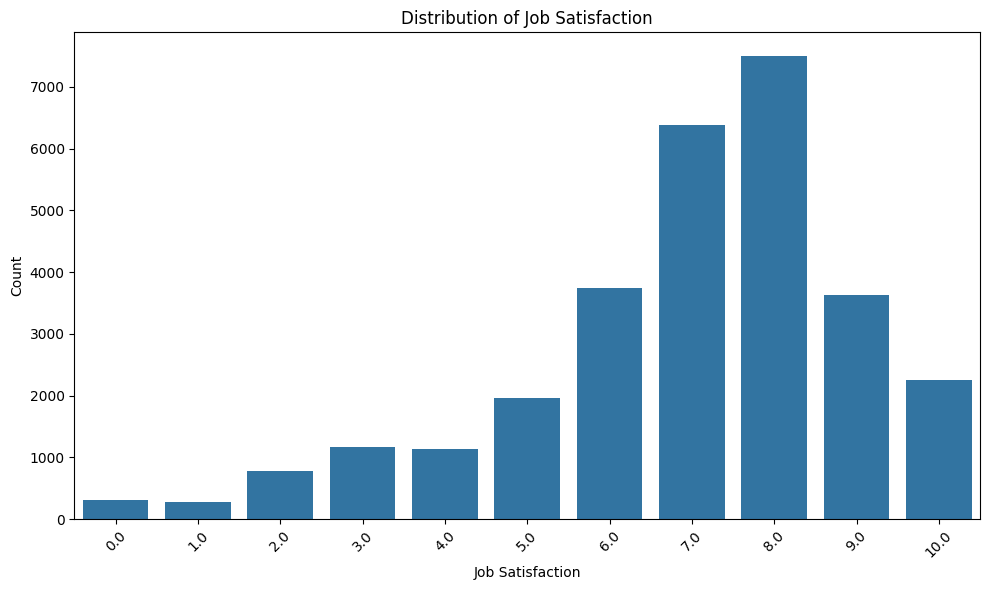

In [9]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.



Remote Work Preferences by Employment Type (%):
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.263723   
Employed, full-time;Employed, part-time                                        40.094340   
Employed, full-time;Independent contractor, fre...                             37.391060   
Employed, full-time;Independent contractor, fre...                             43.478261   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                             57.142857   
Student, full-time;Student, part-time;Retired                                   0.000000   
Student, part-time            

/tmp/ipykernel_907/1638741926.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


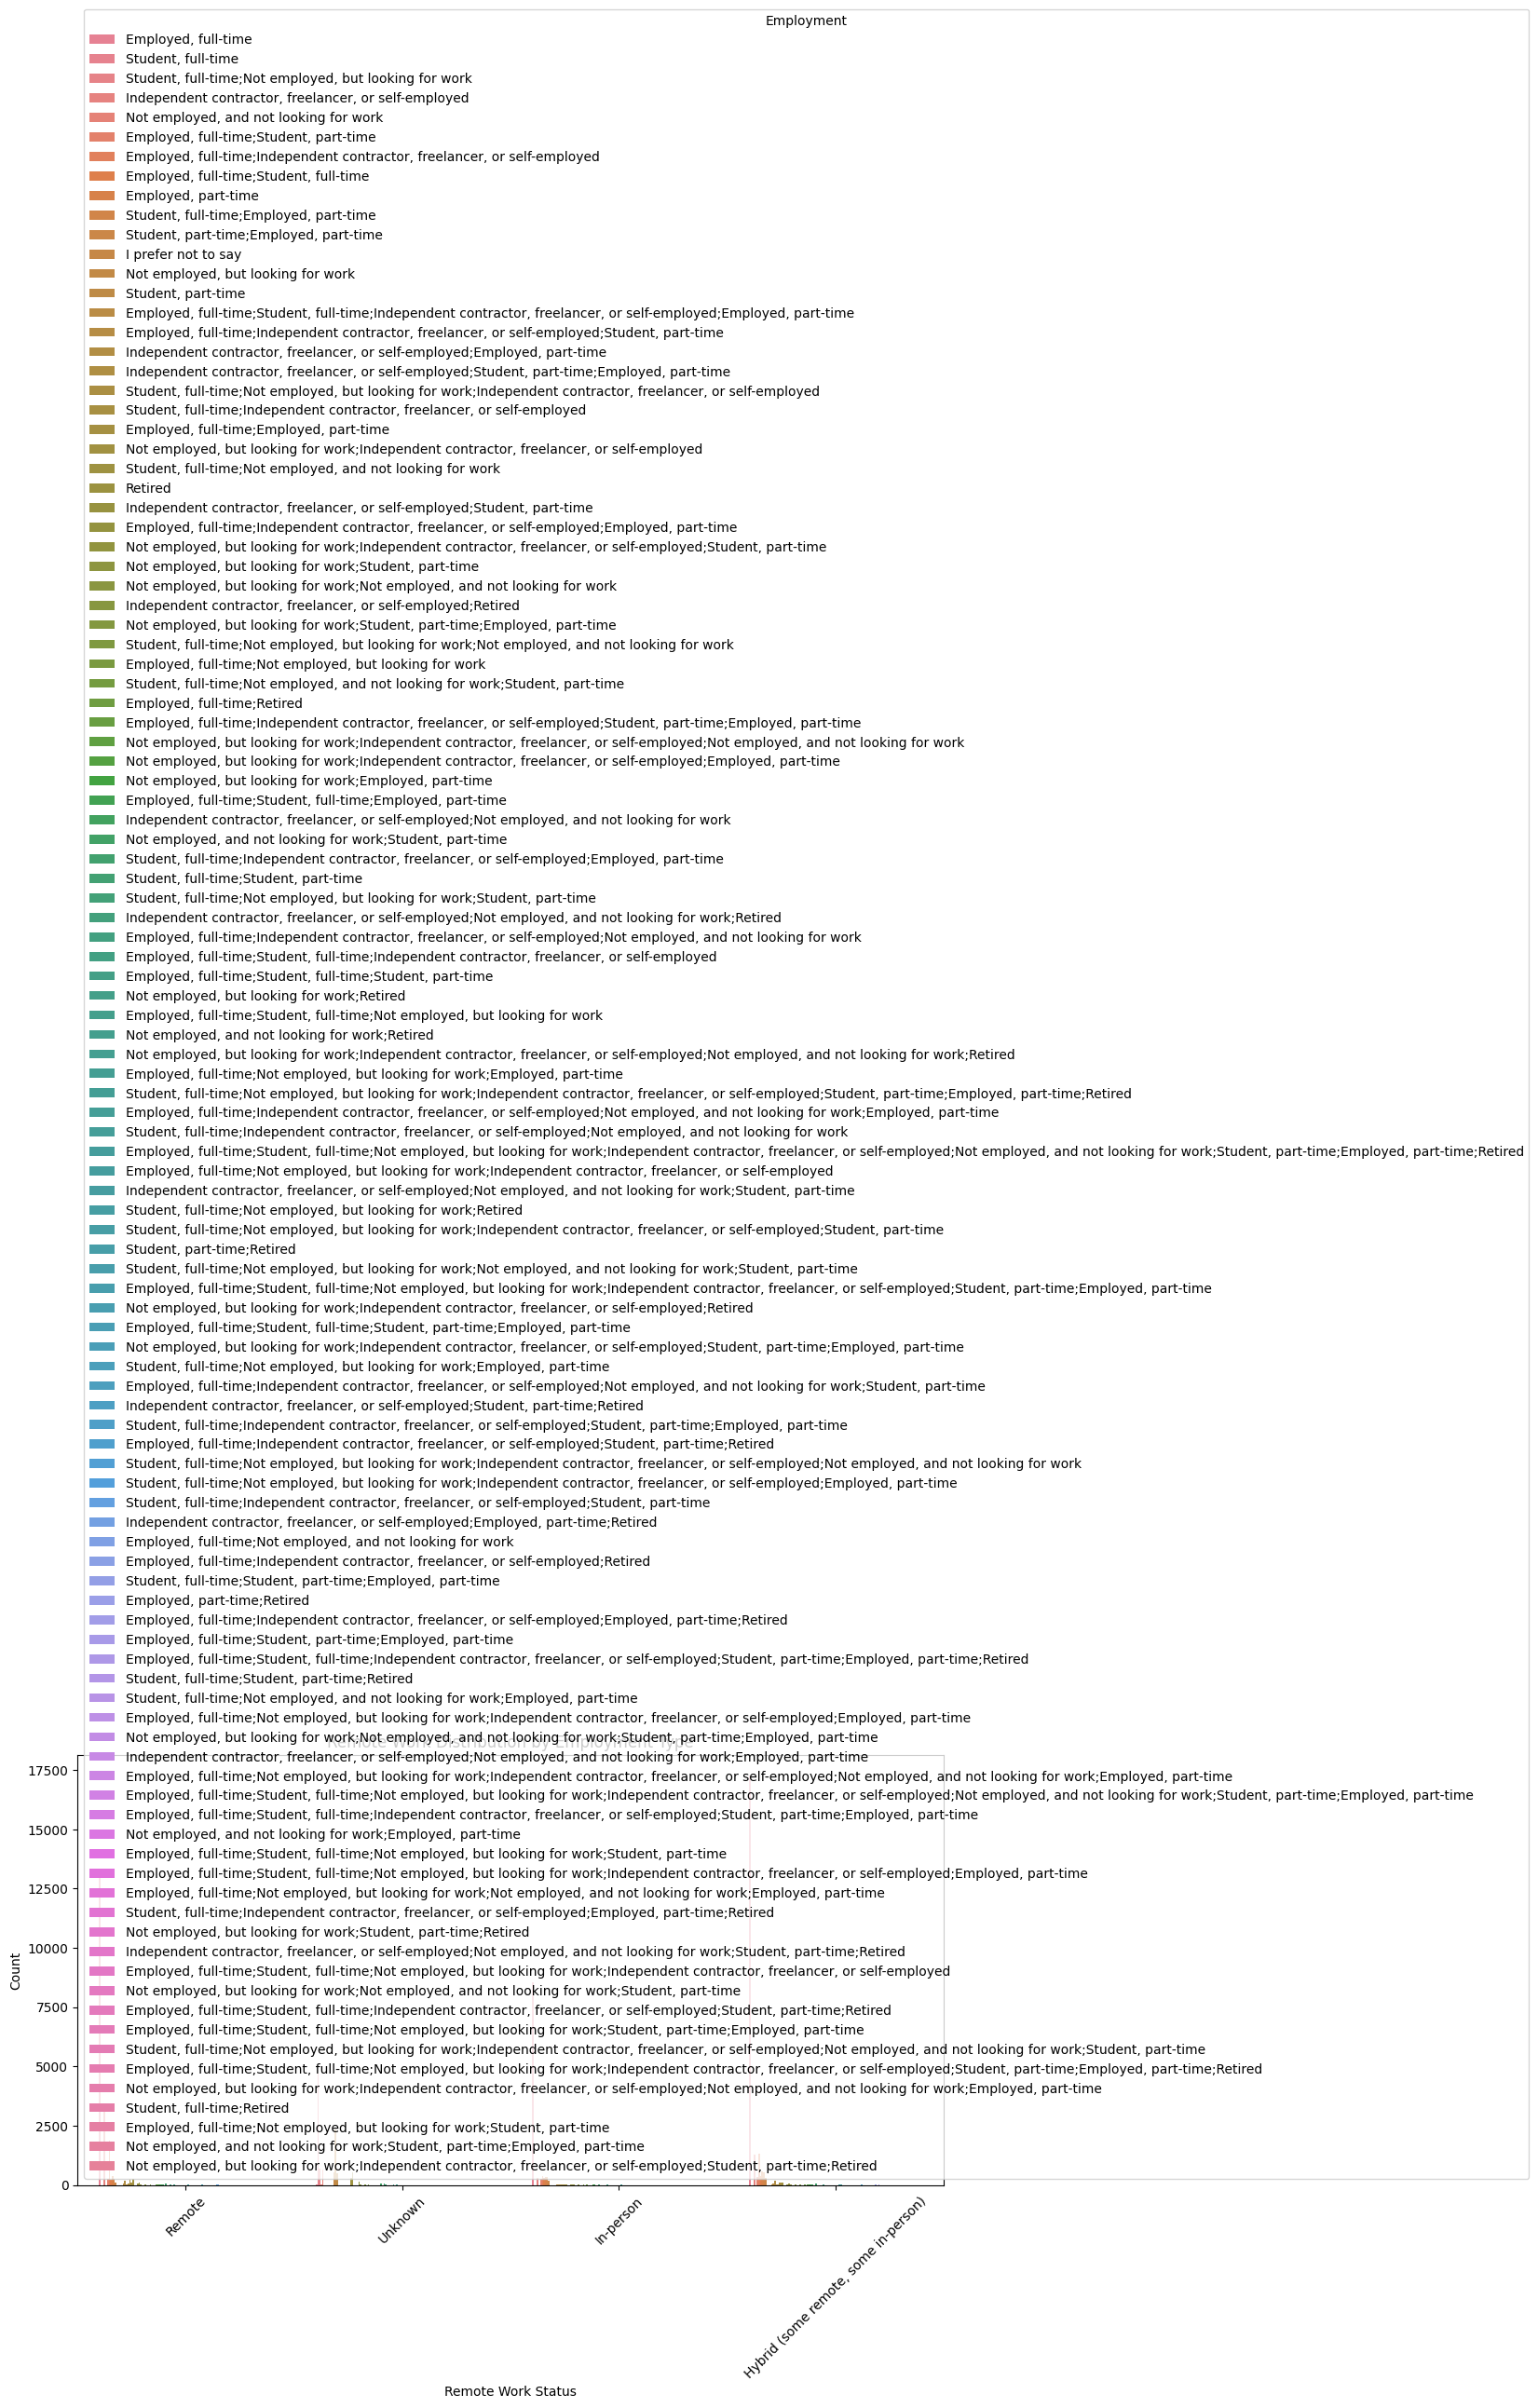

In [10]:
## Write your code here
# Count of remote work preferences by employment type
remote_work_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print("\nRemote Work Preferences by Employment Type (%):\n", remote_work_by_employment)

plt.figure(figsize=(12, 6))
sns.countplot(x='RemoteWork', hue='Employment', data=df)
plt.title('Remote Work Distribution by Employment Type')
plt.xlabel('Remote Work Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


<Figure size 1600x800 with 0 Axes>

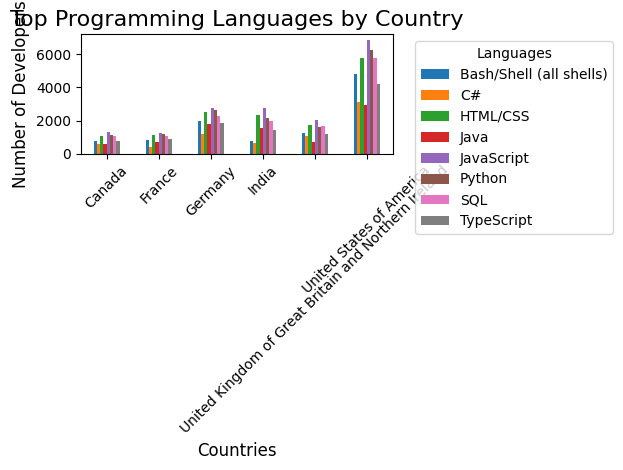

Top Languages Across Top Countries:
Languages                                           Bash/Shell (all shells)  \
Country                                                                       
Canada                                                                  798   
France                                                                  858   
Germany                                                                1970   
India                                                                   759   
United Kingdom of Great Britain and Northern Ir...                     1231   
United States of America                                               4776   

Languages                                             C#  HTML/CSS  Java  \
Country                                                                    
Canada                                               603      1097   571   
France                                               410      1114   706   
Germany                    

In [11]:
## Write your code here
# Split languages into a list
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode the languages to create individual rows
languages_by_region = df.explode('Languages')

# Select top 6 countries by survey participants
top_countries = languages_by_region['Country'].value_counts().head(6).index

# Select top 8 languages overall
top_languages = languages_by_region['Languages'].value_counts().head(8).index

# Filter data for top countries and top languages
filtered_data = languages_by_region[
    languages_by_region['Country'].isin(top_countries) & 
    languages_by_region['Languages'].isin(top_languages)
]

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
plot_data = filtered_data.groupby(['Country', 'Languages']).size().unstack(fill_value=0)

plot_data.plot(kind='bar', stacked=False)
plt.title('Top Programming Languages by Country', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Developers', fontsize=12)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print some additional insights
print("Top Languages Across Top Countries:")
print(plot_data)

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


TypeError: 'value' must be an instance of str or bytes, not a float

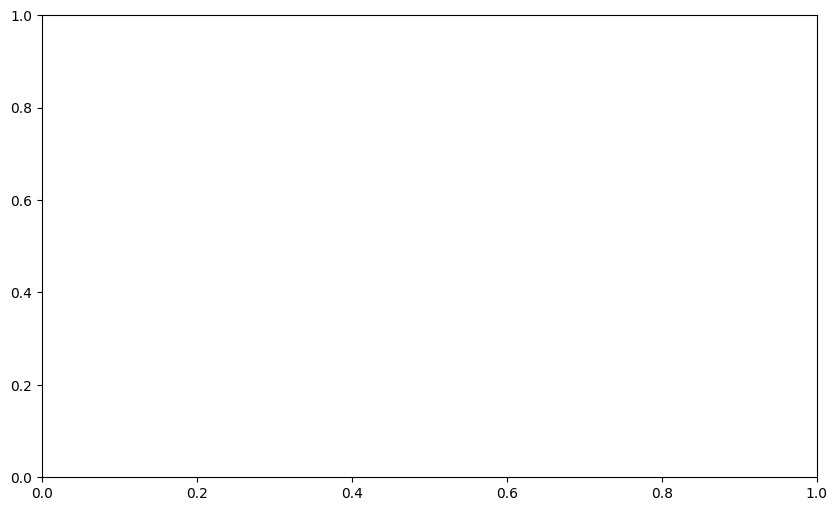

In [13]:
## Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodePro'], df['JobSatPoints_1'], alpha=0.5)
plt.title('Correlation: Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction Points')
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [14]:
## Write your code here
education_employment = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
print("\nEmployment Type by Education Level (%):")
print(education_employment)


Employment Type by Education Level (%):
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.380322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here
df.to_csv('cleaned_stackoverflow_survey.csv', index=False)
print("\nCleaned dataset saved successfully!")


Cleaned dataset saved successfully!


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
